In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
dir_cinco="5cm.xls"
dir_diez="10cm.xls"
dir_quince="15cm.xls"
dir_veinte="20cm.xls"


cinco=pd.read_excel(dir_cinco,header=1,usecols=["Valor_R","Valor_V","Valor_A"])
diez=pd.read_excel(dir_diez,header=1,usecols=["Valor_R","Valor_V","Valor_A"])
quince=pd.read_excel(dir_quince,header=1,usecols=["Valor_R","Valor_V","Valor_A"])
veinte=pd.read_excel(dir_veinte,header=1,usecols=["Valor_R","Valor_V","Valor_A"])

cinco.drop(0, inplace=True)
diez.drop(0, inplace=True)
quince.drop(0, inplace=True)
veinte.drop(0, inplace=True)

cinco["etiqueta"]=5
diez["etiqueta"]=10
quince["etiqueta"]=15
veinte["etiqueta"]=20

df=pd.concat([cinco,diez,quince,veinte], axis=0,ignore_index=True)

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[["Valor_R","Valor_V","Valor_A"]], df["etiqueta"], test_size = 0.3, stratify = df["etiqueta"])

In [4]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:               etiqueta   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     2919.
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          4.98e-207
Time:                        12:14:53   Log-Likelihood:                -385.57
No. Observations:                 277   AIC:                             779.1
Df Residuals:                     273   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0673      0.157     25.857      0.0

C:\Users\ADMIN1\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


El p valor de valor V muestra que no contribuye al modelo

In [5]:
prediccion_train = modelo.predict(exog = X_train)
residuos_train   = prediccion_train - y_train

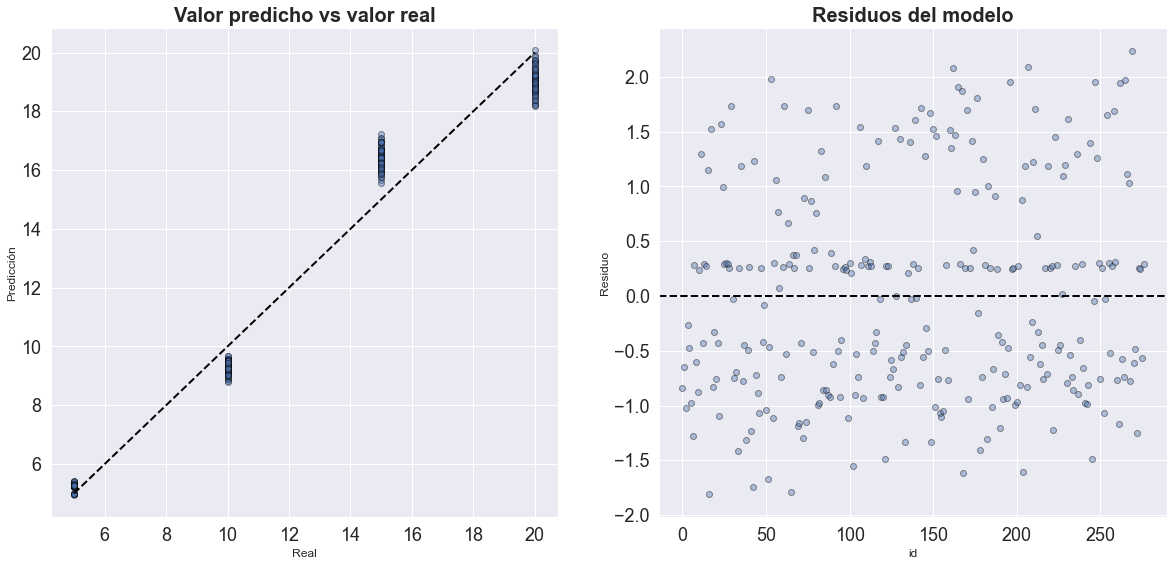

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 9))

axes[ 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[ 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[ 0].set_title('Valor predicho vs valor real', fontsize = 20, fontweight = "bold")
axes[ 0].set_xlabel('Real')
axes[ 0].set_ylabel('Predicción')
axes[ 0].tick_params(labelsize = 18)

axes[ 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[ 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[ 1].set_title('Residuos del modelo', fontsize = 20, fontweight = "bold")
axes[ 1].set_xlabel('id')
axes[ 1].set_ylabel('Residuo')
axes[ 1].tick_params(labelsize = 18)



In [10]:
X_train, X_test, y_train, y_test = train_test_split(df[["Valor_R","Valor_V","Valor_A"]], df["etiqueta"], test_size = 0.3, stratify = df["etiqueta"])

In [17]:
import keras
import tensorflow as tf

In [18]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

model = Sequential()
model.add(Dense(1, input_dim=3,activation='relu'))

model.summary()

opt = tf.keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mean_absolute_error', 'mean_squared_error'])

history = model.fit(X_train, y_train,epochs=1000)
score = model.evaluate(X_test, y_test, verbose=1)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
9/9 [==============================] - 1s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 2/1000
9/9 [==============================] - 0s 3ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 3/1000
9/9 [==============================] - 0s 9ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 4/1000
9/9 [==============================] - 0s 5ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 5/1000
9/9

9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 55/1000
9/9 [==============================] - 0s 3ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 56/1000
9/9 [==============================] - 0s 3ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 57/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 58/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 59/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 60/1000
9/9 [==============================] - 0s 3ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 

9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 111/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 112/1000
9/9 [==============================] - 0s 3ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 113/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 114/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 115/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 116/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841


Epoch 166/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 167/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 168/1000
9/9 [==============================] - 0s 3ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 169/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 170/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 171/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 172/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_e

9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 223/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 224/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 225/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 226/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 227/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 228/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841


Epoch 278/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 279/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 280/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 281/1000
9/9 [==============================] - 0s 3ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 282/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 283/1000
9/9 [==============================] - 0s 3ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 284/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_e

9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 334/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 335/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 336/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 337/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 338/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 339/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841


9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 390/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 391/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 392/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 393/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 394/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 395/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841


9/9 [==============================] - 0s 3ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 446/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 447/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 448/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 449/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 450/1000
9/9 [==============================] - 0s 4ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 451/1000
9/9 [==============================] - 0s 3ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841


9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 501/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 502/1000
9/9 [==============================] - 0s 3ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 503/1000
9/9 [==============================] - 0s 3ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 504/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 505/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 506/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841


9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 556/1000
9/9 [==============================] - 0s 3ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 557/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 558/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 559/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 560/1000
9/9 [==============================] - 0s 3ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 561/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841


Epoch 611/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 612/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 613/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 614/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 615/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 616/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 617/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_e

9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 668/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 669/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 670/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 671/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 672/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 673/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841


9/9 [==============================] - 0s 4ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 724/1000
9/9 [==============================] - 0s 3ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 725/1000
9/9 [==============================] - 0s 4ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 726/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 727/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 728/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 729/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841


Epoch 779/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 780/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 781/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 782/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 783/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 784/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 785/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_e

9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 836/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 837/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 838/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 839/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 840/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 841/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841


Epoch 891/1000
9/9 [==============================] - 0s 3ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 892/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 893/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 894/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 895/1000
9/9 [==============================] - 0s 3ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 896/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 897/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_e

9/9 [==============================] - 0s 4ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 948/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 949/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 950/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 951/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 952/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841
Epoch 953/1000
9/9 [==============================] - 0s 2ms/step - loss: 187.1841 - mean_absolute_error: 12.4910 - mean_squared_error: 187.1841


In [19]:
y_pred = model.predict(X_test)

In [22]:
score

[188.23529052734375, 12.521008491516113, 188.23529052734375]

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 188.24
Variance score: -4.98


In [85]:
weights = model.get_weights()
weights

[array([[-0.80412424],
        [ 0.35838684],
        [ 0.61117655]], dtype=float32),
 array([2.4506068], dtype=float32)]